# **model_XGBoost_2.0** for XRP

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import joblib
from datetime import datetime

data = pd.read_csv('xrp_data_2024_new.csv')

# timestamp를 datetime으로 변환
data['timestamp'] = pd.to_datetime(data['timestamp'])

features = data.drop(columns=['timestamp', 'target_close'])
target = data['target_close']

# 시계열 데이터 분리
train_size = int(len(data) * 0.8)
X_train, X_test = features.iloc[:train_size], features.iloc[train_size:]
y_train, y_test = target.iloc[:train_size], target.iloc[train_size:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
joblib.dump(scaler, 'scaler_2.0.pkl')

model = xgb.XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train_scaled, y_train)

joblib.dump(model, 'model_XGBoost_2.0.pkl')

['model_XGBoost_2.0.pkl']

# **model_XGBoost_3.0** for XRP

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import joblib
from datetime import datetime

# 데이터 로드 및 변환
data = pd.read_csv('xrp_data_2024_latest_2.csv') # 데이터 3056개
data['timestamp'] = pd.to_datetime(data['timestamp'])

# 피처와 타겟 분리
features = data.drop(columns=['timestamp', 'target_close'])
target = data['target_close']

# 시계열 데이터 분리
train_size = int(len(data) * 0.8)
X_train, X_test = features.iloc[:train_size], features.iloc[train_size:]
y_train, y_test = target.iloc[:train_size], target.iloc[train_size:]

# 가중치 부여 (최신 데이터에 높은 가중치)
train_indices = range(len(X_train))
weights = [1 + 2 * (i / len(train_indices)) for i in train_indices]

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#joblib.dump(scaler, 'scaler_3.0.pkl')

# 모델 초기화
model = xgb.XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 모델 학습 (가중치 추가)
model.fit(X_train_scaled, y_train, sample_weight=weights)

# 모델 저장
#joblib.dump(model, 'model_XGBoost_3.0.pkl')
from sklearn.metrics import r2_score
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.9567573721722809


# **model_LSTM_4.0** for XRP

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1953 - val_loss: 0.1013
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0122 - val_loss: 0.0438
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 - val_loss: 0.0430
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082 - val_loss: 0.0354
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 - val_loss: 0.0199
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 - val_loss: 0.0312
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074 - val_loss: 0.0240
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 - val_loss: 0.0173
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062 - val_loss: 0.0090
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 - val_loss: 0.0114
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 - val_loss: 0.0149
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0112


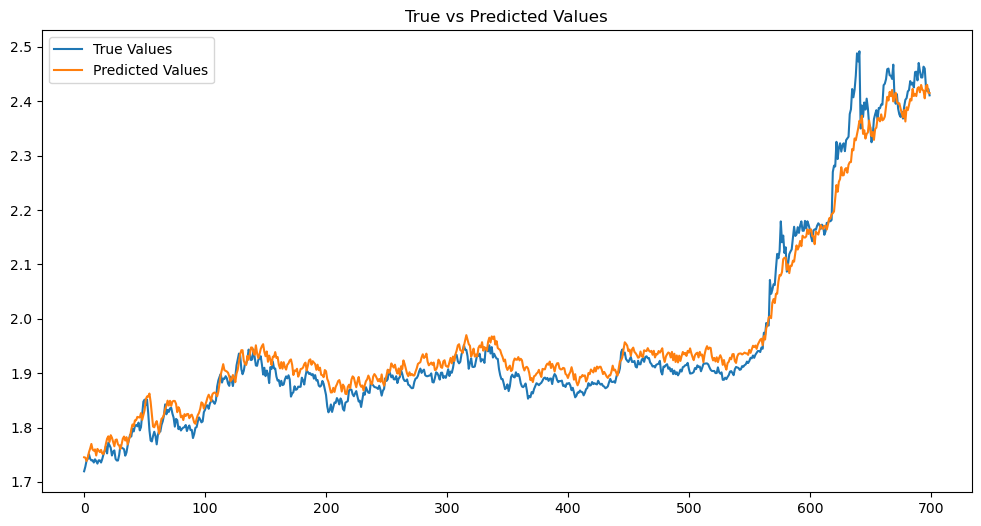

In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib

# 데이터 로드
data = pd.read_csv('xrp_data_2024_latest_3.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])

# 피처와 타겟 분리
features = data.drop(columns=['timestamp', 'target_close'])
target = data['target_close']

# Train-Test Split
train_size = int(len(data) * 0.8)
X_train, X_test = features.iloc[:train_size], features.iloc[train_size:]
y_train, y_test = target.iloc[:train_size], target.iloc[train_size:]

# 데이터 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
joblib.dump(scaler, 'XRP_scaler_LSTM_4.0.pkl')

# 시계열 데이터 생성 함수
def create_sequences(X, y, time_steps=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

# 시계열 데이터 생성
time_steps = 5
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, time_steps)

# LSTM 모델 정의
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.005), loss='mse')

# 조기 종료 콜백
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# 예측 및 평가
y_pred = model.predict(X_test_seq)
r2 = r2_score(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)

print(f"R² Score: {r2}")
print(f"Test MSE: {mse}")

# 모델 저장
joblib.dump(model, 'XRP_model_LSTM_4.0.pkl')

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_seq, label="True Values")
plt.plot(y_pred, label="Predicted Values")
plt.legend()
plt.title("True vs Predicted Values")
plt.show()

# **model_LSTM_1.0** for BTC

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5682055680.0000 - val_loss: 9228258304.0000
Epoch 2/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 5680606208.0000 - val_loss: 9224395776.0000
Epoch 3/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 5674191360.0000 - val_loss: 9220928512.0000
Epoch 4/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 5672692224.0000 - val_loss: 9217609728.0000
Epoch 5/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 5661412352.0000 - val_loss: 9214371840.0000
Epoch 6/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 5685106176.0000 - val_loss: 9211184128.0000
Epoch 7/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 5648456704.0000 - val_loss: 9208025088.0000
Epoch 8/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 5658510336.0000 - val_loss: 9204884480.0000
Epoch 9/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 5638104576.0000 - val_loss: 9201756160.0000
Epoch 10/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - lo

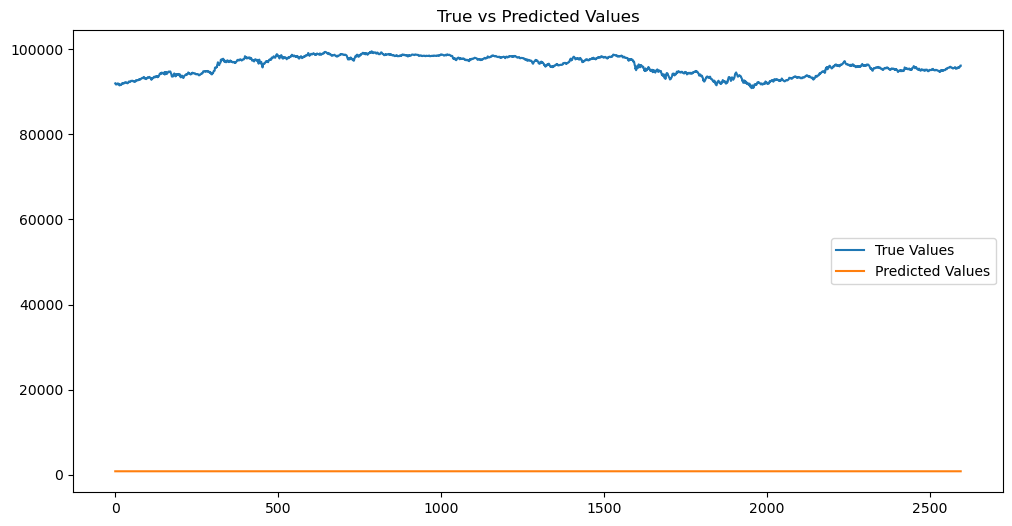

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 데이터 로드
data = pd.read_csv('btc_data_2024_latest.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])

# 피처와 타겟 분리
features = data.drop(columns=['timestamp', 'target_close'])
target = data['target_close']

# Train-Test Split
train_size = int(len(data) * 0.8)
X_train, X_test = features.iloc[:train_size], features.iloc[train_size:]
y_train, y_test = target.iloc[:train_size], target.iloc[train_size:]

# 데이터 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 시계열 데이터 생성 함수
def create_sequences(X, y, time_steps=1):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

# 시계열 데이터 생성
time_steps = 1
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, time_steps)

# LSTM 모델 정의
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 조기 종료 콜백
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# 예측 및 평가
y_pred = model.predict(X_test_seq)
r2 = r2_score(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)

print(f"R² Score: {r2}")
print(f"Test MSE: {mse}")

# 모델 저장 (선택적)
# model.save('lstm_xrp_model.h5')

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_seq, label="True Values")
plt.plot(y_pred, label="Predicted Values")
plt.legend()
plt.title("True vs Predicted Values")
plt.show()